In [7]:
# Try to decompose NZDUSD prices
library(fpp)
library(xts)

# Get EURUSD data
DATA_FOLDER <- '~/Resilio Sync/FXBootcamp'
source(paste0('data-utils.R'))
prices_df <- get_daily_OHLC('NZDUSD')



In [10]:
head(prices_df)

Ticker,Date,Open,High,Low,Close,Volume
NZDUSD,1999-01-01,0.5267,0.5295,0.5260,0.5276,0
NZDUSD,1999-01-04,0.5295,0.5338,0.5288,0.5307,0
NZDUSD,1999-01-05,0.5268,0.5402,0.5265,0.5388,0
NZDUSD,1999-01-06,0.5388,0.5391,0.5341,0.5373,0
NZDUSD,1999-01-07,0.5373,0.5396,0.5342,0.5379,0
NZDUSD,1999-01-08,0.5379,0.5441,0.5372,0.5412,0


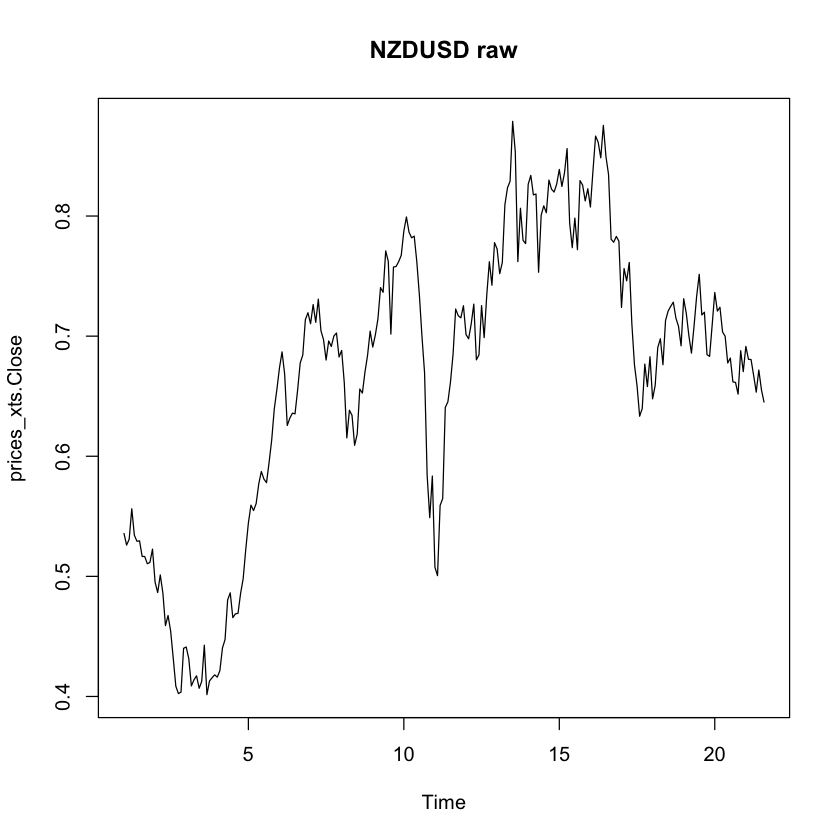

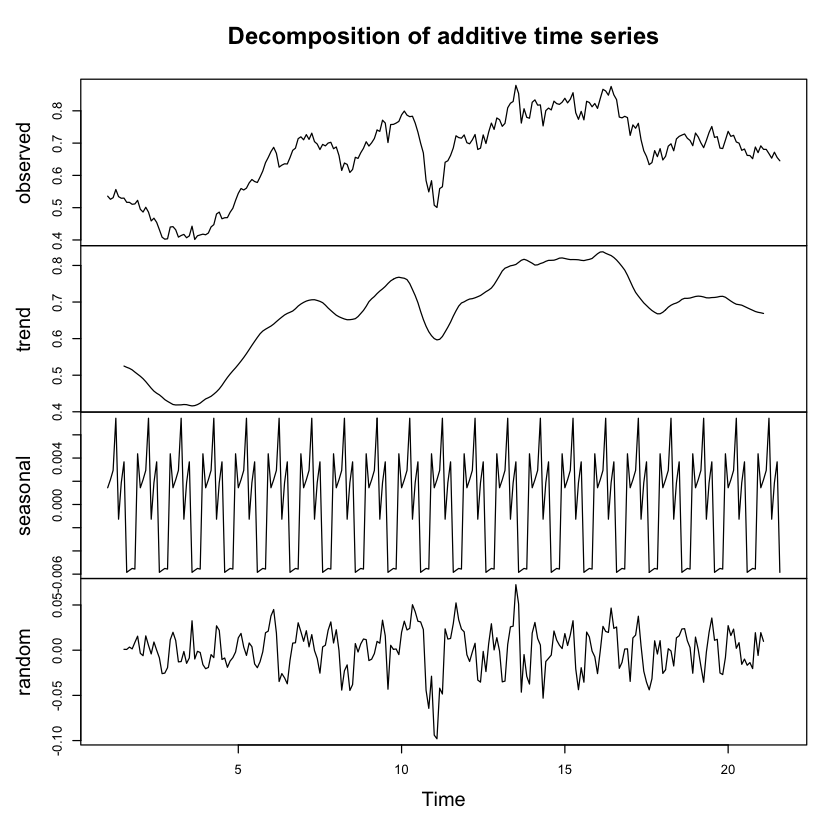

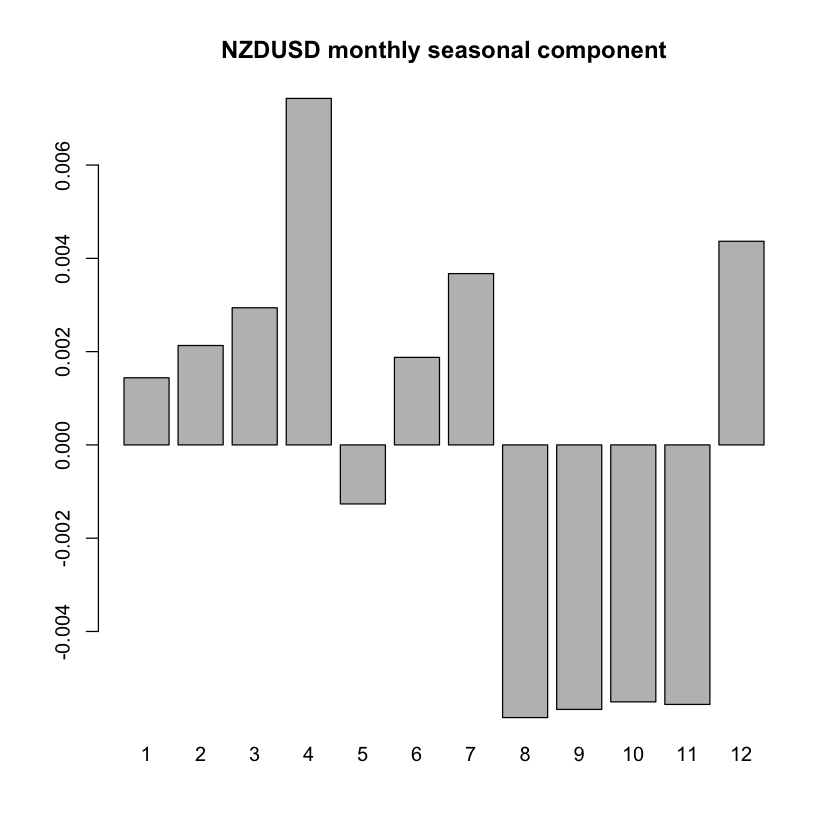

In [11]:

prices_xts <- xts(prices_df$Close, order.by = prices_df$Date)
colnames(prices_xts) <- 'Close'
prices_monthly <- to.monthly(prices_xts)[, 4]
prices_ts <- ts(prices_monthly, frequency = 12) # frequency = 12 is monthly
plot(prices_ts, main = 'NZDUSD raw')

# Decomposed using moving averages
nzdusd_decomposed <- decompose(prices_ts, "additive")
plot(nzdusd_decomposed)

# Plot seasonal component for each month
sp <- nzdusd_decomposed$seasonal[1:12]
barplot(sp, names.arg = 1:12, main = 'NZDUSD monthly seasonal component')